# Computational Workflows for biomedical data

Welcome to the course Computational Workflows for Biomedical Data. Over the next two weeks, you will learn how to leverage nf-core pipelines to analyze biomedical data and gain hands-on experience in creating your own pipelines, with a strong emphasis on Nextflow and nf-core.

Course Structure:

- Week 1: You will use a variety of nf-core pipelines to analyze a publicly available biomedical study.
- Week 2: We will shift focus to learning the basics of Nextflow, enabling you to design and implement your own computational workflows.<br>
- Final Project: The last couple of days, you will apply your knowledge to create a custom pipeline for analyzing biomedical data using Nextflow and the nf-core template.

## Basics

If you have not installed all required software, please do so now asap!


If you already installed all software, please go on and start answering the questions in this notebook. If you have any questions, don't hesitate to approach us.

1. What is nf-core?

A global community collaborating to build open-source Nextflow components and pipelines.

2. How many pipelines are there currently in nf-core?

139 (84 released, 43 under developement, 12 archieved)

3. Are there any non-bioinformatic pipelines in nf-core?

Yes. For example, there is an astronomy pipline Meerpipe.
https://nf-co.re/meerpipe/dev/

4. Let's go back a couple of steps. What is a pipeline and what do we use it for?

It's a series of connected computational algorithms with the intention to compute multiple tasks within a single step. It is usually designed to analyze large datasets in a predefined automated sequence.

5. Why do you think nf-core adheres to strict guidelines?

Quality control and reproducibility. This makes it easier for the community to understand use the pipelines, adapt them and reproduce results. The integrity of the data can be ensured a bit more.

6. What are the main features of nf-core pipelines?

They are open-source and standardized. The pipelines also are documented and contain information about installation, usage and output.
GitHub releases are also used to tag stable versions of the code and software, aiding in making the results reproducible.

## Let's start using the pipelines

1. Find the nf-core pipeline used to measure differential abundance of genes

It can be found in https://nf-co.re/differentialabundance/1.5.0/.

In [ ]:
# run the pipeline in a cell 
# to run bash in jupyter notebooks, simply use ! before the command
# e.g.

!nf-core pipelines launch nf-core/differentialabundance -r 1.5.0


# For the tasks in the first week, please use the command line to run your commands and simply paste the commands you used in the respective cells!


In [ ]:
# run the pipeline in the test profile using docker containers
# make sure to specify the version you want to use (use the latest one)
# took 11min

!nextflow run nf-core/differentialabundance -r 1.5.0 -profile test,docker --outdir nextflow_test/

In [ ]:
# repeat the run. What did change?
!nextflow run nf-core/differentialabundance -r 1.5.0 -profile test,docker --outdir nextflow_test/


It's significantly faster than the first one (first one took 11min, second one 4min). No additional work files are created, only a new log file. The hash numbers changed.

In [ ]:
# now set -resume to the command. What did change?
!nextflow run nf-core/differentialabundance -r 1.5.0 -profile test,docker --outdir nextflow_test/ -resume

Most of the computational part is skipped/looked up in the already existing results, making the process very quick (37sec).
The hashes are the same as before.

Check out the current directory. Next to the outdir you specified, what else has changed?

There are nextflow log files and a work folder with the temp folders.

In [ ]:
# delete the work directory and run the pipeline again using -resume. What did change?
!nextflow run nf-core/differentialabundance -r 1.5.0 -profile test,docker --outdir nextflow_test/ -resume

What changed?
It runs as fast as the second run (4min). Since the hash numbers did not change, the removal of the work order was not as significant as computing everything again from the start.

## Lets look at the results

### What is differential abundance analysis?

Give the most important plots from the report:

Text(0.5, 1.0, 'Abundance dendrogram plot.')

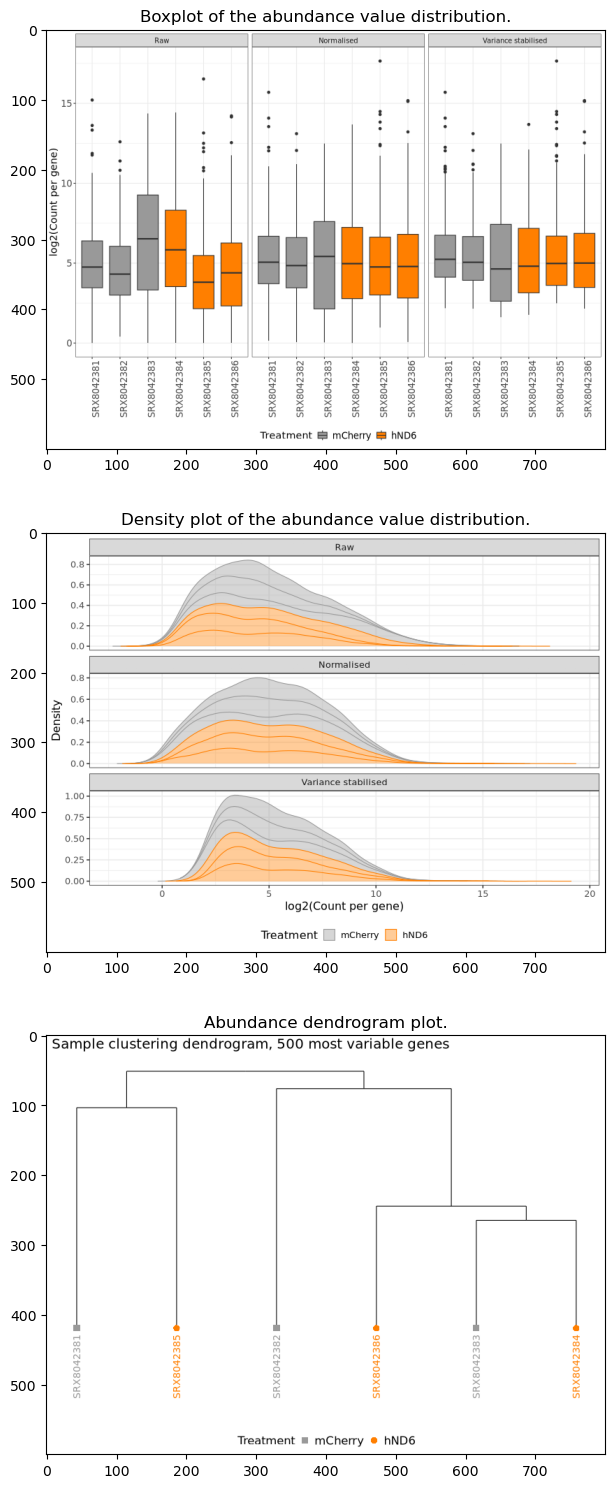

In [15]:
import matplotlib.pyplot as plt
import matplotlib.image as img

# reading the image
boxplot = img.imread('./nextflow_test/plots/exploratory/treatment/png/boxplot.png')
densityplot = img.imread('./nextflow_test/plots/exploratory/treatment/png/density.png')
dendroplot = img.imread('./nextflow_test/plots/exploratory/treatment/png/sample_dendrogram.png')

# displaying the image
fig, (ax1, ax2, ax3) = plt.subplots(3, 1)
fig.set_size_inches(10.5, 18.5)
ax1.imshow(boxplot)
ax1.set_title("Boxplot of the abundance value distribution.")
ax2.imshow(densityplot)
ax2.set_title("Density plot of the abundance value distribution.")
ax3.imshow(dendroplot)
ax3.set_title("Abundance dendrogram plot.")